In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.__version__

'1.26.0'

In [2]:
inputs = []
outputs = []
end = False
while not end:
    x, y = int(input("Enter the x-coordinate: ")), int(input("Enter the y-coordinate: "))
    inputs.append(x)
    outputs.append(y)
    end_message = input("Add another point? (Yes or no): ")
    if end_message.lower() == "no":
        end = True
    elif end_message.lower() == "yes":
        end = False
    else:
        print("Incorrect Value! Please enter yes or no: ")


In [4]:
inputs, outputs

([1, 2, 3], [1, 4, 9])

In [5]:
x = np.array(inputs)
y = np.array(outputs)

# Creating a design matrix:
X = np.vstack([np.ones(x.shape), x, x**2]).T
X

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [6]:
inputs, outputs

([1, 2, 3], [1, 4, 9])

In [12]:
coefficients = np.linalg.solve(X.T @ X, X.T @ y)
coefficients
result = coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

In [15]:
result, y

(array([1., 4., 9.]), array([1, 4, 9]))

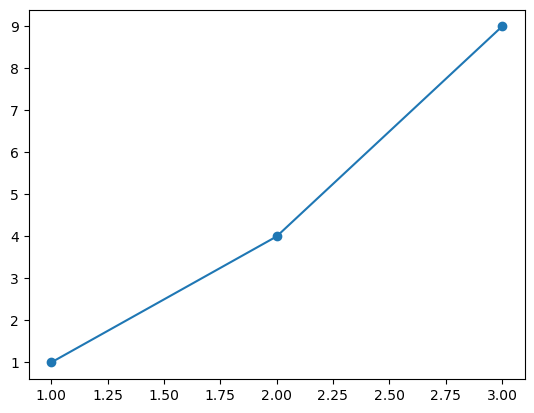

In [17]:
plt.scatter(x, y)
plt.plot(x, result)

Estimated Coefficients:
beta_0: 1.1799999999999915
beta_1: -0.917142857142852
beta_2: 0.9428571428571422


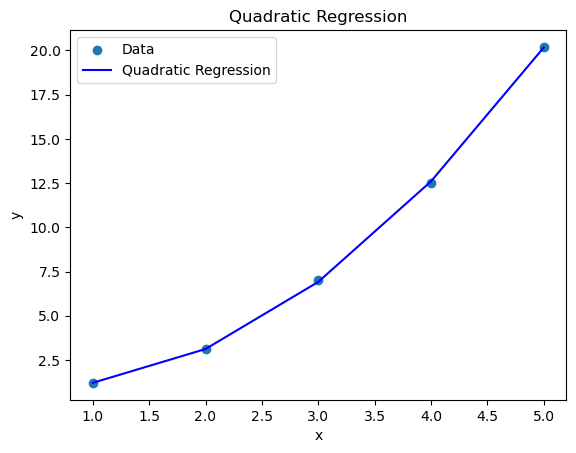

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 3.1, 7.0, 12.5, 20.2])

# Create a design matrix for the quadratic model
X = np.vstack((np.ones_like(x), x, x**2)).T

# Use the normal equation to estimate coefficients
coefficients = np.linalg.solve(X.T @ X, X.T @ y)

# The coefficients vector contains the estimated values
beta_0, beta_1, beta_2 = coefficients

# Print the estimated coefficients
print("Estimated Coefficients:")
print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("beta_2:", beta_2)

# Plot the quadratic regression line
curve = beta_0 + beta_1 * x + beta_2 * x**2
plt.scatter(x, y, label="Data")
plt.plot(x, curve, label="Quadratic Regression", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Regression")
plt.legend()
plt.show()


# Without Normal Equation

We can use matrix inversion. Since Quadratics are $Y = X^T\theta$

In [1]:
# Using matrix inversion:
import numpy as np
x = np.array([1, 2, 3])
X = np.concatenate([np.ones(x.shape), x, x**2]).reshape(3, 3).T
X

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [2]:
y = np.array([1, 4, 9]).reshape((3,1))
y.shape

(3, 1)

In [3]:
theta = np.arange(1, 4).reshape(3, 1)
theta

array([[1],
       [2],
       [3]])

In [4]:
np.dot(np.linalg.inv(X), y)

array([[0.],
       [0.],
       [1.]])

In [17]:
# Creating functions:
def design_matrix(x):
    r"""Calculates the coefficient matrix, when given design matrix and output matrix.
    Follows the $y = X^T\theta$.
    Arguments:
        - x (Array): A input matrix that needs to converted."""
    import numpy as np
    x = np.concatenate([np.ones(x.shape), x, np.multiply(x, x)]).reshape(x.shape + x.shape)
    return x.T
def calculate_theta(X, y, degree=2):
    r"""Calculates the coefficient matrix, when given design matrix and output matrix.
    Follows the $y = X^T\theta$.
    Arguments:
        - X (Array): A design matrix that can be inverted to find coefficient matrix.
        - y (Array): A output matrix."""
    import numpy as np
    # Ensuring that the design matrix is 3 x 3:
    if X.shape != (degree + 1, degree + 1):
        raise ValueError(f"Design matrix doesn't have shape (3, 3)."
                         f"Current Shape: {X.shape}")
    return np.linalg.inv(X) @ y # np.linalg.solve(X, y)

def main():
    import numpy as np
    x = np.arange(1, 4)
    y = np.arange(1, 4).reshape(-1, 1) ** 2
    X = design_matrix(x)
    theta = calculate_theta(X, y, degree=2)
    return f"{theta[2][0]}x^2 + {theta[1][0]}x + {theta[0][0]}"

In [18]:
main()

'1.0x^2 + 0.0x + 0.0'

In [20]:
import numpy as np
x = np.arange(1, 4)
y = np.arange(1, 4).reshape(-1, 1) ** 2

In [21]:
x, y

(array([1, 2, 3]),
 array([[1],
        [4],
        [9]]))

In [1]:
import numpy as np

In [2]:
np.min([1, 2, 3])

1